[View in Colaboratory](https://colab.research.google.com/github/RXV06021/testPy2/blob/master/dataSeach.ipynb)

# 探索的データ解析（EDA）の基礎操作

出典：https://www.codexa.net/basic-exploratory-data-analysis-with-python/

探索的データ解析は機械学習のタスクの一番最初のフェーズで、まずはデータに触れてみて、データを視覚化したり、データのパターンを探したり、特徴量やターゲットの関係性/相関性を感じるとるのが目的。

## ■　必要ライブリーのインポート

In [0]:
import pandas as pd                   # pandasを「pd」としてインポート
pd.options.display.max_columns = 32   # pandasの列最大表示数を指定

import matplotlib.pyplot as plt       # matplotlibを「plt」としてインポート
import numpy as np                    # numpyを「np」としてインポート

%matplotlib inline
                                      # Jupyter notebookを使っている場合はmatplotlibのインラインを設定

## ■　データセットをデータフレームとしてインポート

出典：https://qiita.com/uni-3/items/201aaa2708260cc790b8
　　　https://www.kaggle.com/uciml/iris

In [2]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [0]:
# read data
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')), header=-0)

## ■　基本的なデータ探索

### （１）データの一部を表示

In [5]:
# Irisのデータフレームの最初の5行を表示させる
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Irisのデータフレームの最初の8行を表示させる
data.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:
# Irisのデータセットの最後の5行を表示する
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### （２）データフレーム全体の情報を要約

In [8]:
# info()を使ってIrisデータフレームをみてみる
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### （３）基本統計量

In [9]:
# データセットの基本統計量を表示
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### （４）データの要約

In [11]:
# アヤメの種類毎の特徴量のデータ分散を確認してみる
Irisdes= data.groupby(['Species'])
round(Irisdes.describe(),2)

Id                                                     \
                count   mean    std    min     25%    50%     75%    max   
Species                                                                    
Iris-setosa      50.0   25.5  14.58    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.58   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.58  101.0  113.25  125.5  137.75  150.0   

                PetalLengthCm                                        ...   \
                        count  mean   std  min  25%   50%   75%  max ...    
Species                                                              ...    
Iris-setosa              50.0  1.46  0.17  1.0  1.4  1.50  1.58  1.9 ...    
Iris-versicolor          50.0  4.26  0.47  3.0  4.0  4.35  4.60  5.1 ...    
Iris-virginica           50.0  5.55  0.55  4.5  5.1  5.55  5.88  6.9 ...    

                SepalLengthCm                                        \
                        count  mean   std  min   25%  50%  75%  max   
Species                                                               
Iris-setosa              50.0  5.01  0.35  4.3  4.80  5.0  5.2  5.8   
Iris-versicolor          50.0  5.94  0.52  4.9  5.60  5.9  6.3  7.0   
Iris-virginica           50.0  6.59  0.64  4.9  6.22  6.5  6.9  7.9   

                SepalWidthCm                                         
                       count  mean   std  min   25%  50%   75%  max  
Species                                                              
Iris-setosa             50.0  3.42  0.38  2.3  3.12  3.4  3.68  4.4  
Iris-versicolor         50.0  2.77  0.31  2.0  2.52  2.8  3.00  3.4  
Iris-virginica          50.0  2.97  0.32  2.2  2.80  3.0  3.18  3.8  

[3 rows x 40 columns]

PetalLengthCM（花弁の長さ）を比較してみると、Iris-SetosaとIris-versicolorで大きく異なっているのが分かる。

*   Iris-Setosa　　　最小-最大値＝1.0〜1.9cm
*   Iris-versicolor　　最小-最大値＝3.0～5.1cm

In [12]:
# 特定のカラム（Species）のユニークな値を出力する
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# value_counts()でSpeciesのカラムの情報をみてみる
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### （５）分析に使わないカラムの削除

 drop() を使って、実際にデータフレームから Id のカラムを削除する。

In [14]:
# データフレームからIdのカラムを削除する
Iris = data.drop(['Id'],axis=1)
Iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### （６）データの可視化

**ヒストグラム**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82dcae3d68>,
      dtype=object)

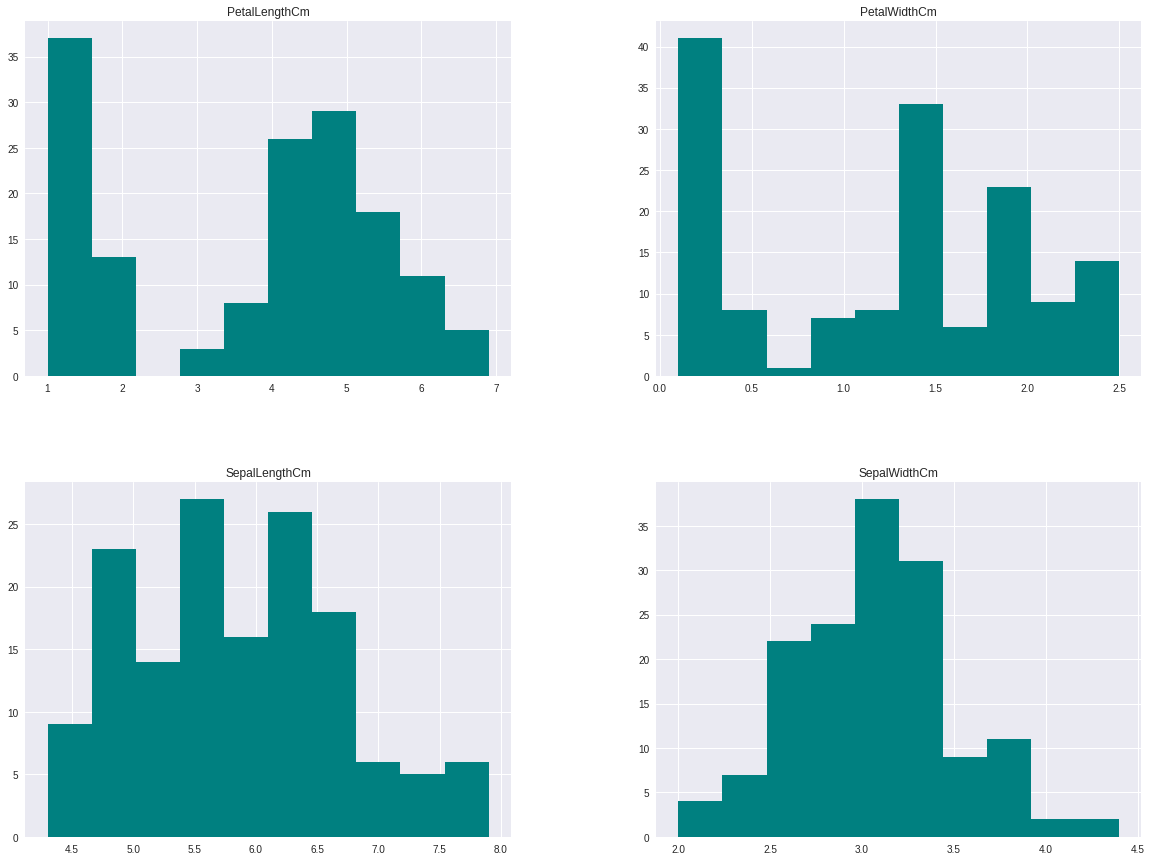

In [15]:
# Irisのデータフレームからヒストグラムを作成
Iris.hist(bins=10, figsize=(20,15), color = 'teal')

各カラムのデータの分散を一目で把握することが可能。例えばがく片の幅と長さ。山が二つあるように見える（Bimodal Curv -二項曲線）。データの数字だけをみていても解りにくいことが、このようにグラフを作ることで一目で把握できることもある。

**特徴量ごとに重ねたヒストグラム**

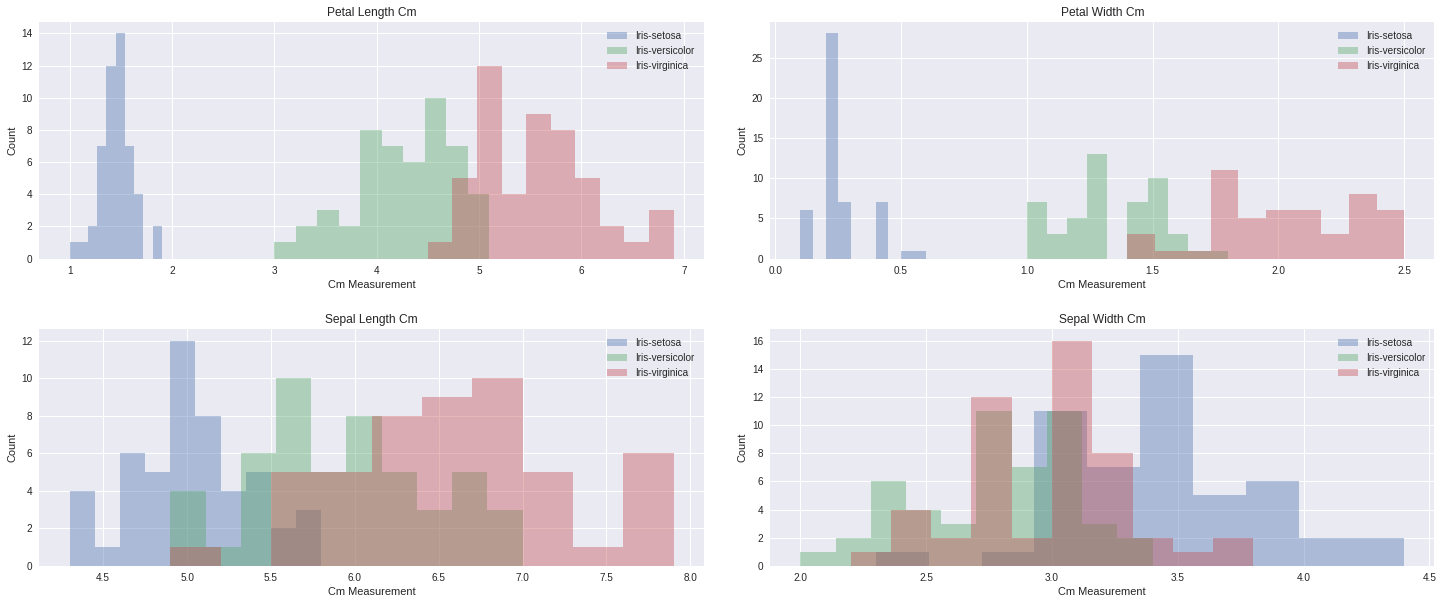

In [17]:
# ヒストグラムを作成
fig = plt.figure(figsize=(25,10))

p1 = fig.add_subplot(2,2,1)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-setosa'], bins=10, alpha = .4)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-versicolor'], bins=10, alpha = .4)
p1.hist(Iris.PetalLengthCm[Iris.Species == 'Iris-virginica'], bins=10, alpha = .4)
plt.title('Petal Length Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.legend(labels)

p2 = fig.add_subplot(2,2,2)
p2.hist(Iris.PetalWidthCm[Iris.Species == 'Iris-setosa'], bins=10, alpha = .4)
p2.hist(Iris.PetalWidthCm[Iris.Species == 'Iris-versicolor'], bins=10, alpha = .4)
p2.hist(Iris.PetalWidthCm[Iris.Species == 'Iris-virginica'], bins=10, alpha = .4)
plt.title('Petal Width Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.legend(labels)

p3 = fig.add_subplot(2,2,3)
p3.hist(Iris.SepalLengthCm[Iris.Species == 'Iris-setosa'], bins=10, alpha = .4)
p3.hist(Iris.SepalLengthCm[Iris.Species == 'Iris-versicolor'], bins=10, alpha = .4)
p3.hist(Iris.SepalLengthCm[Iris.Species == 'Iris-virginica'], bins=10, alpha = .4)
plt.title('Sepal Length Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.legend(labels)
plt.title('Sepal Length Cm')

p4 = fig.add_subplot(2,2,4)
p4.hist(Iris.SepalWidthCm[Iris.Species == 'Iris-setosa'], bins=10, alpha = .4)
p4.hist(Iris.SepalWidthCm[Iris.Species == 'Iris-versicolor'], bins=10, alpha = .4)
p4.hist(Iris.SepalWidthCm[Iris.Species == 'Iris-virginica'], bins=10, alpha = .4)
plt.title('Sepal Width Cm')
plt.xlabel('Cm Measurement')
plt.ylabel('Count')
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
plt.legend(labels)

plt.subplots_adjust(wspace=.1, hspace=.3)
plt.show()

上記は各特徴量（がく片と花弁の長さ&幅）をターゲットクラス（3種類のアヤメの種類）毎に分けて、重ねて表示させたヒストグラム。

例えば、左端のPetalLengthCm（がく片の長さ）のグラフを見てみると、人間の目で見てもかなり明確に種別を判別できる傾向が出ている。グラフを作成するのは、時間がかかる作業ではあるが、このように後々、非常に役に立つ情報が見つかる可能性もあるので、手間ではあるが、初めて触るデータは時間をとってしっかりと可視化したい。

**散布図（スキャタープロット）**

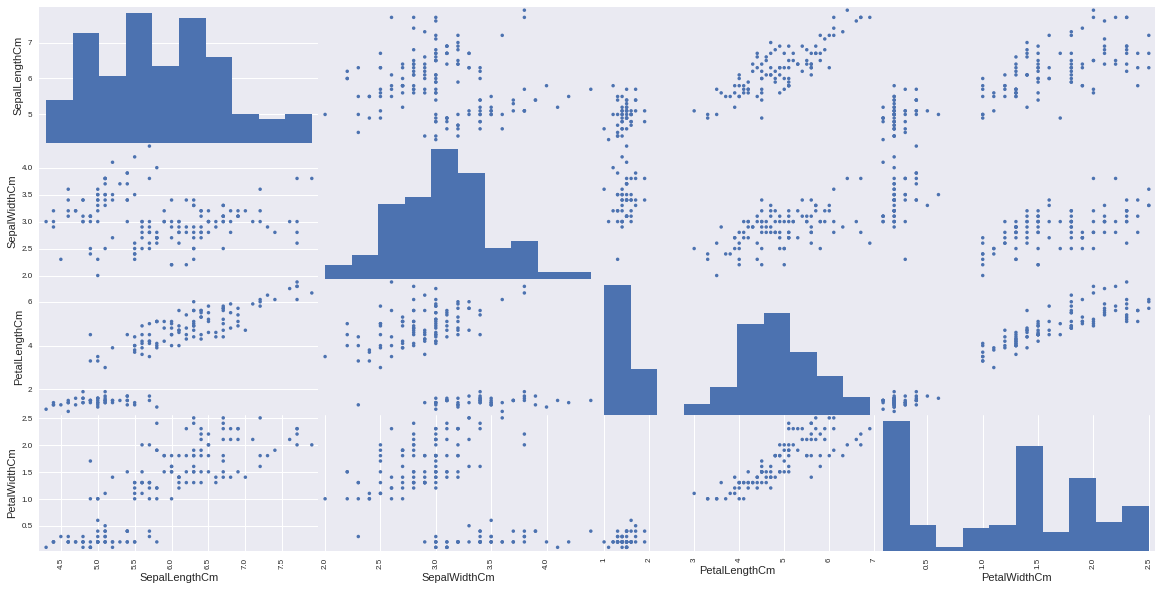

In [18]:
# ヒストグラムと散布図の行列を作成
from pandas.plotting import scatter_matrix
x = scatter_matrix(Iris, alpha=1, figsize=(20, 10), diagonal='hist')

各グラフに枠が欲しい

たった一行のコードで、このように各特徴量も散布図のマトリックス（行列）が作成できてしまう。Matplotlibがデータサイエンティストの人気のツールの理由が解る。

今度のグラフは、2つの特徴量での散布図が出ている。例えば、4段目の右から数えて3つ目の散布図。2つの特徴量「萼片の長さと萼片の幅」には「強い正の線形関係」があることが把握できる。

## ■　データフレームのフィルタリング

データサイエンスの世界では、頻繁にデータテーブルにフィルターをかけて、ある特定の事柄について詳しくみていく作業が発生する。例えば、会社の全期間の売り上げデータの中から、毎年の三月のみ比較して分析するなどを考えてみると想像しやすい。

In [19]:
# データフレームの行インデックスが6-20までを表示
Iris[6:20]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


In [20]:
# 行インデックス6-20の間で3等間隔にフィルター
Iris[6:20:3]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
6,4.6,3.4,1.4,0.3,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


In [21]:
# カラムに値を指定してフィルタリング
# アヤメの種類が「Iris-setosa」で最初の10行のデータを表示
Iris[Iris.Species == 'Iris-setosa'][0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [22]:
# 2つのカラム＆条件指定をしてフィルタリング
# 「Iris-setosa」の「SepalLengthCm」が5.5より大きいデータを表示
Iris[(Iris.Species == 'Iris-setosa') & (Iris.SepalLengthCm > 5.5)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


In [23]:
# カラムをSpeciesとSpealLengthCmのみ表示する
Iris[['Species','SepalLengthCm']][0:10]

,Species,SepalLengthCm
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7
3,Iris-setosa,4.6
4,Iris-setosa,5.0
5,Iris-setosa,5.4
6,Iris-setosa,4.6
7,Iris-setosa,5.0
8,Iris-setosa,4.4
9,Iris-setosa,4.9


## ■　データフレームの順番の並び替え（ソート）

データフレームの並び替えを行う場面も出てくる。機械学習でモデル訓練前にはデータフレームをランダムに並び替えをするのが一般的。またデータ解析時には上昇順、下降順のような並び替えを行う場合もある。

大規模なデータになると、一定の条件でフィルターをして、さらに並び替えをするなどの処理を行いながらデータ解析を行うことがある。

In [24]:
# 並び替え
Iris.sort_values('SepalLengthCm', axis=0, ascending=False)[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,7.9,3.8,6.4,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


## ■　外れ値の確認

In [25]:
# データフレームの欠損を確認
# null とは空白、つまり欠損しているデータの事
Iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

今回のアヤメのデータセットは学術的な利用もされている初歩的なデータセットなので、欠損無し。しかし実際の仕事などで扱うデータには欠損が無いのがむしろ珍しい。

欠損が見つかった場合、一番シンプルな処理方法としては、その欠損が含むデータを削除してしまうこと。

ただし、例えば今回のように比較的小さいデータセット（全件150）で、仮に3割に欠損が見つかってしまい、それを全て削除してしまうと、モデル訓練に使えるデータがそれだけ減ってしまう＝最終的な精度に大きな影響が出てしまう。

そのような場合は、近似したデータの平均や中央値などを代入したり、他の計算で代入値を導き出したりする。